<a href="https://colab.research.google.com/github/DevBatra05/DeepLearningLab/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Neural Network implementation for classification using Any DL Framework (TensorFlow/pytorch)


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

In [4]:
from google.colab import files
ss=files.upload()

Saving winequality-red.csv to winequality-red.csv


In [5]:
data = pd.read_csv('winequality-red.csv')
X = data.drop('quality', axis=1)
y = data['quality']
# Convert the target variable to binary (good or not good)
y = (y >= 6).astype(int)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Change to 'sigmoid' for binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])

In [9]:
model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6602 - mae: 0.4745 - val_loss: 0.5515 - val_mae: 0.3997
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5338 - mae: 0.3822 - val_loss: 0.5187 - val_mae: 0.3573
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5267 - mae: 0.3598 - val_loss: 0.5072 - val_mae: 0.3446
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4636 - mae: 0.3193 - val_loss: 0.5043 - val_mae: 0.3385
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4651 - mae: 0.3214 - val_loss: 0.5013 - val_mae: 0.3368
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4679 - mae: 0.3196 - val_loss: 0.4941 - val_mae: 0.3335
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4530 - mae: 0.3074 - val_loss: 0.4975 - val_mae: 0.3281
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4504 - mae: 0.3051 - val_loss: 0.4870 - val_mae: 0.3277
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.45

In [10]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Confusion Matrix:
 [[106  52]
 [ 30 132]]
F1 Score: 0.7420471078604852
Accuracy: 0.74375
Precision: 0.7484015345268542
Recall: 0.742850445382091


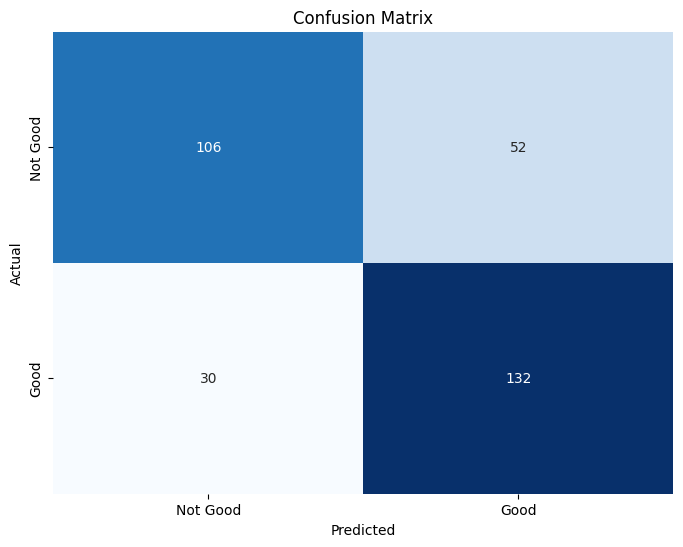

In [11]:
# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')  # or 'micro'/'weighted' depending on your needs
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # adjust here
recall = recall_score(y_test, y_pred, average='macro')

print("Confusion Matrix:\n", conf_matrix)
print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()